<a href="https://colab.research.google.com/github/Megha-S-K/Fit_Recommendation/blob/main/cloth_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AssemblyAI-Examples/mediapipe-python.git
!pip install mediapipe
!pip install PyQt5
!pip install ipython==7.32.0

Cloning into 'mediapipe-python'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 45 (delta 14), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (45/45), 31.45 MiB | 22.79 MiB/s, done.
Resolving deltas: 100% (14/14), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.9/793.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.8 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed

In [1]:
import mediapipe as mp
import cv2
import numpy as np

print("All imports successful!")


All imports successful!


In [11]:
import cv2
import mediapipe as mp
import numpy as np

# MediaPipe Pose setup
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)
mp_drawing = mp.solutions.drawing_utils

# Function to detect pose from an image
def detect_pose(image_path):
    # Load the image (ensure path is valid)
    img = cv2.imread(image_path)

    # Check if the image is loaded correctly
    if img is None:
        raise FileNotFoundError(f"Image not found at the provided path: {image_path}")

    # Convert the image to RGB (MediaPipe requires RGB input)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Process the image to detect pose landmarks
    results = pose.process(img_rgb)

    return img, results

# Example usage with corrected path (Windows path with forward slashes or raw string)
image, results = detect_pose('D:/254011/women.jpeg')  # Use raw string or forward slashes


FileNotFoundError: Image not found at the provided path: D:/254011/women.jpeg

In [14]:
from google.colab import files


In [15]:
uploaded = files.upload()


Saving women.jpg to women (2).jpg


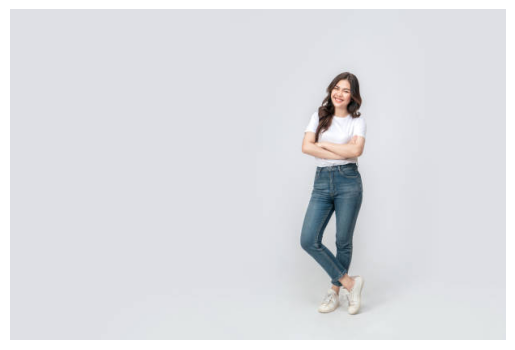

In [17]:
import cv2
import matplotlib.pyplot as plt

# Load the uploaded image
img = cv2.imread('women.jpg')  # Use the uploaded file name

# Convert image from BGR to RGB (OpenCV loads images in BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()


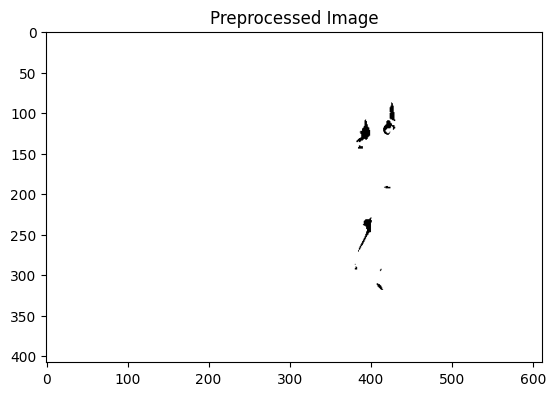

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess the image
def preprocess_image(image_path):
    # Load the image in color (BGR)
    image = cv2.imread(image_path)

    # Convert the image to grayscale for simplicity
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to remove noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image to highlight important features (optional)
    _, thresholded = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY)

    return thresholded

# Visualize the processed image
image_path = 'women.jpg'  # Update this with the correct path
processed_image = preprocess_image(image_path)

plt.imshow(processed_image, cmap='gray')
plt.title("Preprocessed Image")
plt.show()


[INFO] Estimated Shoulder: 25.40 cm, Waist: 15.50 cm
[✅] Recommended Size: S


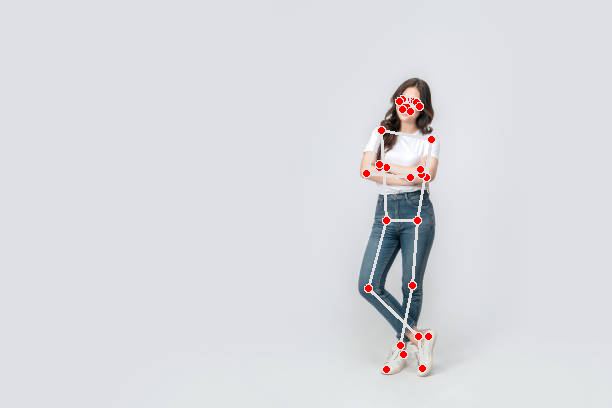

In [20]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=2)
mp_drawing = mp.solutions.drawing_utils

# Size chart (simplified for demo)
size_chart = {
    'S': {'shoulder': 35, 'waist': 70},
    'M': {'shoulder': 40, 'waist': 80},
    'L': {'shoulder': 45, 'waist': 90},
    'XL': {'shoulder': 50, 'waist': 100},
}

# Load image
image_path = 'women.jpg'  # Replace with your own image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pose.process(image_rgb)

def calculate_distance(p1, p2, image_width, image_height):
    x1, y1 = int(p1.x * image_width), int(p1.y * image_height)
    x2, y2 = int(p2.x * image_width), int(p2.y * image_height)
    return np.linalg.norm([x2 - x1, y2 - y1])

if results.pose_landmarks:
    image_height, image_width = image.shape[:2]

    # Extract shoulders and hips
    landmarks = results.pose_landmarks.landmark
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER]
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP]

    shoulder_width = calculate_distance(left_shoulder, right_shoulder, image_width, image_height)
    waist_width = calculate_distance(left_hip, right_hip, image_width, image_height)

    # Convert to cm (assume a known scale, here simplified)
    scale_factor = 0.5  # Just for demo; normally use reference object or depth
    shoulder_cm = shoulder_width * scale_factor
    waist_cm = waist_width * scale_factor

    print(f"[INFO] Estimated Shoulder: {shoulder_cm:.2f} cm, Waist: {waist_cm:.2f} cm")

    # Find matching size
    recommended_size = None
    for size, dims in size_chart.items():
        if shoulder_cm <= dims['shoulder'] and waist_cm <= dims['waist']:
            recommended_size = size
            break
    recommended_size = recommended_size or 'XL+'

    print(f"[✅] Recommended Size: {recommended_size}")

    # Optional: draw pose landmarks
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Display image in Colab
    cv2_imshow(image)  # Replace cv2.imshow() with cv2_imshow() in Colab
else:
    print("[ERROR] Could not detect pose landmarks. Try another image.")
